In [13]:
import nltk
import spacy
import numpy as np
import pandas as pd

# following line is optional for custom vocabulary installation
# you can use nlp = spacy.load('en')
nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

In [18]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'The brown fox is quick and he is jumping over the lazy dog'

In [9]:
words = sentence.split()
np.random.shuffle(words)
print(words)

['quick', 'is', 'fox', 'brown', 'The', 'and', 'the', 'is', 'he', 'dog', 'lazy', 'jumping', 'over']


In [19]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [15]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,VERB,ADJ,CCONJ,PRON,VERB,VERB,ADP,DET,ADJ,NOUN


In [24]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


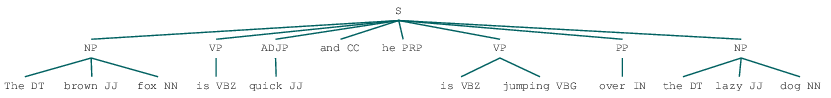

In [25]:
# visualize shallow parse tree
shallow_parsed_sent

In [38]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

In [39]:
from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser.jar',
                   path_to_models_jar='E:/stanford/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')
                   
result = list(scp.raw_parse(sentence))
print(result[0])

(ROOT
  (NP
    (S
      (S
        (NP (DT The) (JJ brown) (NN fox))
        (VP (VBZ is) (ADJP (JJ quick))))
      (CC and)
      (S
        (NP (PRP he))
        (VP
          (VBZ is)
          (VP
            (VBG jumping)
            (PP (IN over) (NP (DT the) (JJ lazy) (NN dog)))))))))


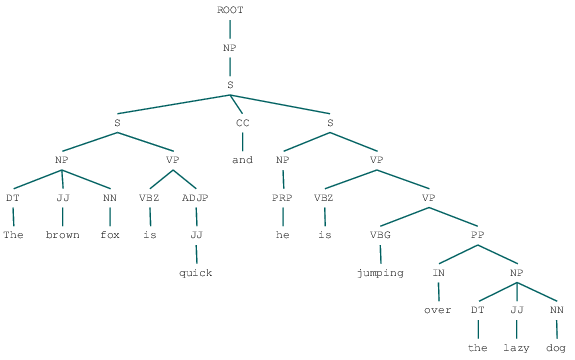

In [40]:
# visualize constituency tree
result[0]

In [41]:
# load the Brown Corpus
from nltk.corpus import brown

# total categories
print('Total Categories:', len(brown.categories()))

Total Categories: 15


In [42]:
# print the categories
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [43]:
# tokenized sentences
brown.sents(categories='mystery')

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [44]:
# POS tagged sentences
brown.tagged_sents(categories='mystery')

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

In [47]:
# get sentences in natural form
sentences = brown.sents(categories='mystery')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] # viewing the first 5 sentences

['There were thirty-eight patients on the bus the morning I left for Hanover , most of them disturbed and hallucinating .',
 'An interne , a nurse and two attendants were in charge of us .',
 "I felt lonely and depressed as I stared out the bus window at Chicago's grim , dirty West Side .",
 'It seemed incredible , as I listened to the monotonous drone of voices and smelled the fetid odors coming from the patients , that technically I was a ward of the state of Illinois , going to a hospital for the mentally ill .',
 'I suddenly thought of Mary Jane Brennan , the way her pretty eyes could flash with anger , her quiet competence , the gentleness and sweetness that lay just beneath the surface of her defenses .']

In [48]:
# get tagged words
tagged_words = brown.tagged_words(categories='mystery')

# get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP', 'NN'])]

nouns[0:10] # view the first 10 nouns

[('patients', 'NNS'),
 ('bus', 'NN'),
 ('morning', 'NN'),
 ('Hanover', 'NP'),
 ('interne', 'NN'),
 ('nurse', 'NN'),
 ('attendants', 'NNS'),
 ('charge', 'NN'),
 ('bus', 'NN'),
 ('window', 'NN')]

In [49]:
# build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

# view top 10 occuring nouns
nouns_freq.most_common(10)

[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('Mrs.', 46)]

In [50]:
# load the Reuters Corpus
from nltk.corpus import reuters

# total categories
print('Total Categories:', len(reuters.categories()))

Total Categories: 90


In [51]:
# print the categories
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [52]:
# get sentences in housing and income categories
sentences = reuters.sents(categories=['housing', 'income'])
sentences = [' '.join(sentence_tokens) for sentence_tokens in sentences]
sentences[0:5]  # view the first 5 sentences

["YUGOSLAV ECONOMY WORSENED IN 1986 , BANK DATA SHOWS National Bank economic data for 1986 shows that Yugoslavia ' s trade deficit grew , the inflation rate rose , wages were sharply higher , the money supply expanded and the value of the dinar fell .",
 'The trade deficit for 1986 was 2 . 012 billion dlrs , 25 . 7 pct higher than in 1985 .',
 'The trend continued in the first three months of this year as exports dropped by 17 . 8 pct , in hard currency terms , to 2 . 124 billion dlrs .',
 'Yugoslavia this year started quoting trade figures in dinars based on current exchange rates , instead of dollars based on a fixed exchange rate of 264 . 53 dinars per dollar .',
 "Yugoslavia ' s balance of payments surplus with the convertible currency area fell to 245 mln dlrs in 1986 from 344 mln in 1985 ."]

In [53]:
# fileid based access
print(reuters.fileids(categories=['housing', 'income']))

['test/16118', 'test/18534', 'test/18540', 'test/18664', 'test/18665', 'test/18672', 'test/18911', 'test/19875', 'test/20106', 'test/20116', 'training/1035', 'training/1036', 'training/10602', 'training/10604', 'training/11170', 'training/11665', 'training/2618', 'training/29', 'training/3105', 'training/3708', 'training/3720', 'training/3723', 'training/3898', 'training/5883', 'training/5886', 'training/6000', 'training/6067', 'training/6197', 'training/7005', 'training/7006', 'training/7015', 'training/7036', 'training/7098', 'training/7099', 'training/9615']


In [54]:
print(reuters.sents(fileids=[u'test/16118', u'test/18534']))

[['YUGOSLAV', 'ECONOMY', 'WORSENED', 'IN', '1986', ',', 'BANK', 'DATA', 'SHOWS', 'National', 'Bank', 'economic', 'data', 'for', '1986', 'shows', 'that', 'Yugoslavia', "'", 's', 'trade', 'deficit', 'grew', ',', 'the', 'inflation', 'rate', 'rose', ',', 'wages', 'were', 'sharply', 'higher', ',', 'the', 'money', 'supply', 'expanded', 'and', 'the', 'value', 'of', 'the', 'dinar', 'fell', '.'], ['The', 'trade', 'deficit', 'for', '1986', 'was', '2', '.', '012', 'billion', 'dlrs', ',', '25', '.', '7', 'pct', 'higher', 'than', 'in', '1985', '.'], ...]


In [56]:
# load the Wordnet Corpus
from nltk.corpus import wordnet as wn

word = 'hike' # taking hike as our word of interest
# get word synsets
word_synsets = wn.synsets(word)
word_synsets

[Synset('hike.n.01'),
 Synset('rise.n.09'),
 Synset('raise.n.01'),
 Synset('hike.v.01'),
 Synset('hike.v.02')]

In [64]:
# get details for each synonym in synset
for synset in word_synsets:
    print(('Synset Name: {name}\n'
           'POS Tag: {tag}\n'
           'Definition: {defn}\n'
           'Examples: {ex}\n').format(name=synset.name(),
                                      tag=synset.pos(),
                                      defn=synset.definition(),
                                      ex=synset.examples()))
          

Synset Name: hike.n.01
POS Tag: n
Definition: a long walk usually for exercise or pleasure
Examples: ['she enjoys a hike in her spare time']

Synset Name: rise.n.09
POS Tag: n
Definition: an increase in cost
Examples: ['they asked for a 10% rise in rates']

Synset Name: raise.n.01
POS Tag: n
Definition: the amount a salary is increased
Examples: ['he got a 3% raise', 'he got a wage hike']

Synset Name: hike.v.01
POS Tag: v
Definition: increase
Examples: ['The landlord hiked up the rents']

Synset Name: hike.v.02
POS Tag: v
Definition: walk a long way, as for pleasure or physical exercise
Examples: ['We were hiking in Colorado', 'hike the Rockies']

